## 텐서플로로 텍스트 생성하기
- 이전의 문장을 시퀀스로 바꾼 후 토큰의 임베딩을 기반으로 문장을 분류했던 방식과는 다른 방식으로 수행
- 시퀀스를 입력 시퀀스와 레이블로 변환해서 매핑하는 훈련이 필요

#### 시퀀스를 입력 시퀀스로 변경하기

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import tensorflow as tf

In [14]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_wards)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [9]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
  
print(input_sequences[:5])

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68]]


In [11]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen = max_sequence_len, padding = 'pre'))


In [12]:
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

In [16]:
# 일종의 분류문제로 훈련할 단어의 개수, 즉 어휘 사전 개수만큼의 뉴련을 가진 출력층이 필요
# 훈련을 위해 원핫 인코딩으로 레이블 변환
# 원핫 인코딩된 레이블은 매우 희소한 표현이기 때문에 훈련 데이터와 단어가 많다면 메모리가 금방 부족해질 것
# 하지만 생성모델의 구조상 필요한 구조
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

#### 모델 만들기

In [17]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len - 1)))
model.add(Dense(total_words, activation = 'softmax'))

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [19]:
history = model.fit(xs, ys, epochs = 1500, verbose = 1)

Epoch 1/1500
15/15 [==============================] - 5s 12ms/step - loss: 5.5706 - accuracy: 0.0177
Epoch 2/1500
15/15 [==============================] - 0s 9ms/step - loss: 5.5607 - accuracy: 0.0243
Epoch 3/1500
15/15 [==============================] - 0s 9ms/step - loss: 5.5480 - accuracy: 0.0221
Epoch 4/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.5233 - accuracy: 0.0464
Epoch 5/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.4656 - accuracy: 0.0508
Epoch 6/1500
15/15 [==============================] - 0s 9ms/step - loss: 5.3284 - accuracy: 0.0508
Epoch 7/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.1653 - accuracy: 0.0508
Epoch 8/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0900 - accuracy: 0.0375
Epoch 9/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0648 - accuracy: 0.0419
Epoch 10/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.0530 - accuracy:

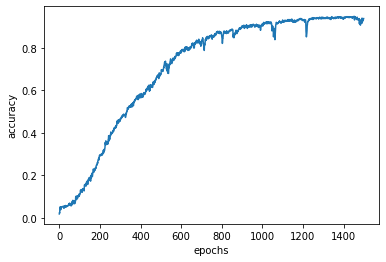

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

#### 텍스트 생성하기

In [24]:
# 다음 단어 예측하기

seed_text = 'in the town of athy'
token_list = tokenizer.texts_to_sequences([seed_text])[0] # 하나의 값만 전달하지만 배열을 반환하기에 배열의 첫 번째 원소 선택

token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')

predicted = np.argmax(model.predict(token_list), axis = -1)
print(predicted)

1/1 [==============================] - 2s 2s/step
[68]


In [26]:
for word, index in tokenizer.word_index.items():
  if index == predicted:
    print(word)
    break

one


In [29]:
# 예측을 연결해 텍스트 생성하기

seed_text= 'sweet jeremy saww dublin'
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list), axis = -1)
  output_word = ''

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word

print(seed_text)

1/1 [==============================] - 0s 37ms/step
sweet jeremy saww dublin made merry and and him milliner long rose up his


In [30]:
# 데이터셋 확장하기
!wget https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt

--2023-03-20 12:25:15--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2023-03-20 12:25:16 (97.0 MB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [31]:
data = open('irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [32]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [33]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [34]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                           maxlen=max_sequence_len, padding='pre'))

In [35]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [36]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
seed_text = "in the town of athy"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], 
                           maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
tokenizer.index_word[predicted[0]]

In [ ]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

#### 모델 구조 바꾸기

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

#### 데이터 개선하기

- 새로운 노래 가사 추가없이 데이터셋 크기를 늘리는 윈도잉(windowing) 사용
- 모든 줄을 하나의 긴 텍스트처럼 다루는데 윈도(window)를 만들어 n개의 단어를 처리 후 한 단어 앞으로 이동해 입력 시퀀스 생성
- 전체 개수;는 (number_of_words - window_size) * window_size

In [38]:
window_size = 10
sentences = []
alltext = []
data = open('irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words) - window_size
for i in range(0, range_size):
  thissentence = ''
  for word in range(0, window_size - 1):
    word = words[i + word]
    thissentence = thissentence + word
    thissentence = thissentence + " "
  sentences.append(thissentence)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(window_size-1, return_sequences='True')))
model.add(Bidirectional(LSTM(window_size-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)


In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

- 튜닝 가능한 많은 하이퍼파라미터 존재
- 윈도 크기를 변경하면 훈련 데이터 양 변화
- 작게하면 데이터가 더 많아지지만 하나의 레이블에 매핑되는 단어가 적어져 알 수 없는 글이  생성됩니다.
- 이외에도 임베딩 차원, LSTM 뉴런 개수, 어휘 사전 크기 등이 변경 가능합니다.

In [ ]:
# 하이퍼 파라미터 변경
window_size = 6
sentences = []
alltext = []
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 16))
model.add(Bidirectional(LSTM(32, return_sequences='True')))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

#### 문자 기반 인코딩
- 텍스트 생성 시 문자 기반 인코딩을 고려 가능
- 고유한 문자의 개수가 고유한 단어의 수 보다 훨씬 적기 때문에 적은 뉴런을 둘 수 있어 모델이 간단해집니다.
- 문자 인코딩은 또 다른 장점은 구두점 문자도 포함할 수 있어 줄 바꿈과 같은 문자를 예측할 수 있습니다.